In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_columns', 636)

!conda update -y -c anaconda matplotlib

!conda update -y -c anaconda seaborn


pisa = pd.read_csv('pisa2012.csv', encoding='latin-1',
       index_col=0,
       dtype={15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 37: str,
           45: str, 65: str, 123: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str,
           162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str,
           171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str,
           292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str,
           301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str,
           313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str,
           322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str,
           331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str,
           340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str,
           349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str,
           376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str,
           385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str,
           394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str,
           403: str, 475: str, 30: str, 31: str, 36: str, 155: str}
)

raw.shape

raw.head()


raw = raw[['STIDSTD','ST04Q01','CNT','PV1MATH','PV1READ','PV1SCIE','ST11Q01','ST11Q02','ST57Q05','HISCED','ST87Q01' ,'ST87Q06' ,'ST87Q07' ]]


raw.rename({'STIDSTD':'Student Id', 'ST04Q01':'Gender','CNT':'Country', 
             'PV1MATH':'Math Score', 'PV1READ':"Reading Score",'PV1SCIE':'Science Score',
             'ST11Q01':'Mother Present', 'ST11Q02':'Father Present', 
           'ST87Q01':'Feel Like Outsider', 
 'ST87Q06'  : 'Feel Lonely at School'  , 
 'ST87Q07'  : 'Feel Happy at School' },
            axis='columns', inplace=True)

raw.shape

raw.to_csv('pisa_filtered.csv')

## Data Assessment

In [2]:
df=pd.read_csv('pisa_filtered.csv')

In [3]:
df.shape

(485490, 13)

In [4]:
df.head()

,Unnamed: 0,Student Id,Gender,Country,Math Score,Reading Score,Science Score,Mother Present,Father Present,HISCED,Feel Like Outsider,Feel Lonely at School,Feel Happy at School
0,1,1,Female,Albania,406.8469,249.5762,341.7009,Yes,Yes,"ISCED 3A, ISCED 4",Agree,Strongly disagree,Agree
1,2,2,Female,Albania,486.1427,406.2936,548.9929,Yes,Yes,"ISCED 5A, 6",NaN,NaN,NaN
2,3,3,Female,Albania,533.2684,401.2100,499.6643,Yes,Yes,"ISCED 5A, 6",NaN,NaN,NaN
3,4,4,Female,Albania,412.2215,547.3630,438.6796,Yes,Yes,"ISCED 5A, 6",NaN,NaN,NaN
4,5,5,Female,Albania,381.9209,311.7707,361.5628,Yes,Yes,"ISCED 3A, ISCED 4",Strongly disagree,Strongly disagree,Strongly agree


In [5]:
df.columns

Index(['Unnamed: 0', 'Student Id', 'Gender', 'Country', 'Math Score',
       'Reading Score', 'Science Score', 'Mother Present', 'Father Present',
       'HISCED', 'Feel Like Outsider', 'Feel Lonely at School',
       'Feel Happy at School'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0                    0
Student Id                    0
Gender                        0
Country                       0
Math Score                    0
Reading Score                 0
Science Score                 0
Mother Present            24931
Father Present            44454
HISCED                    12399
Feel Like Outsider       173714
Feel Lonely at School    174538
Feel Happy at School     175209
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Unnamed: 0               0
Student Id               0
Gender                   0
Country                  0
Math Score               0
Reading Score            0
Science Score            0
Mother Present           0
Father Present           0
HISCED                   0
Feel Like Outsider       0
Feel Lonely at School    0
Feel Happy at School     0
dtype: int64

In [9]:
df.loc[((df['Father Present']== "Yes") & (df['Mother Present'] == "Yes")), "Parent"] = "Both"
df.loc[((df['Father Present']== "No") & (df['Mother Present'] == "Yes")), "Parent"] = "Mother"
df.loc[((df['Father Present']== "Yes") & (df['Mother Present'] == "No")), "Parent"] = "Father"
df.loc[((df['Father Present']== "No") & (df['Mother Present'] == "No")), "Parent"] = "None"

In [10]:
df['Average']=(df['Math Score']+df['Science Score']+df['Reading Score'])/3

In [11]:
df.Parent.value_counts()

Both      228816
Mother     31418
None       11272
Father      5112
Name: Parent, dtype: int64

## Outsider index

In [12]:
df['Outsider_index']=np.NaN
df.loc[(df['Feel Like Outsider']== "Strongly agree") , "Outsider_index"] = "4"
df.loc[(df['Feel Like Outsider']== "Agree") , "Outsider_index"] = "3"
df.loc[(df['Feel Like Outsider']== "Disagree") , "Outsider_index"] = "2"
df.loc[(df['Feel Like Outsider']== "Strongly disagree") , "Outsider_index"] = "1"

In [13]:
df['Outsider_index'].value_counts()

2    122041
1    119750
3     23831
4     10996
Name: Outsider_index, dtype: int64

## Loneliness index

In [14]:
df['Loneliness_index']=np.NaN
df.loc[(df['Feel Lonely at School']== "Strongly agree") , "Loneliness_index"] = "4"
df.loc[(df['Feel Lonely at School']== "Agree") , "Loneliness_index"] = "3"
df.loc[(df['Feel Lonely at School']== "Disagree") , "Loneliness_index"] = "2"
df.loc[(df['Feel Lonely at School']== "Strongly disagree") , "Loneliness_index"] = "1"
df['Loneliness_index'].value_counts()

1    134347
2    112097
3     21761
4      8413
Name: Loneliness_index, dtype: int64

## Happiness Index

In [15]:


df['Happiness_index']=np.NaN
df.loc[(df['Feel Happy at School']== "Strongly agree") , "Happiness_index"] = "1"
df.loc[(df['Feel Happy at School']== "Agree") , "Happiness_index"] = "2"
df.loc[(df['Feel Happy at School']== "Disagree") , "Happiness_index"] = "3"
df.loc[(df['Feel Happy at School']== "Strongly disagree") , "Happiness_index"] = "4"
df['Happiness_index'].value_counts()

2    153724
1     74572
3     37460
4     10862
Name: Happiness_index, dtype: int64

In [16]:
df['Feel Happy at School'].value_counts()

Agree                153724
Strongly agree        74572
Disagree              37460
Strongly disagree     10862
Name: Feel Happy at School, dtype: int64

In [17]:
 df.dropna()

,Unnamed: 0,Student Id,Gender,Country,Math Score,Reading Score,Science Score,Mother Present,Father Present,HISCED,Feel Like Outsider,Feel Lonely at School,Feel Happy at School,Parent,Average,Outsider_index,Loneliness_index,Happiness_index
0,1,1,Female,Albania,406.8469,249.5762,341.7009,Yes,Yes,"ISCED 3A, ISCED 4",Agree,Strongly disagree,Agree,Both,332.708000,3,1,2
4,5,5,Female,Albania,381.9209,311.7707,361.5628,Yes,Yes,"ISCED 3A, ISCED 4",Strongly disagree,Strongly disagree,Strongly agree,Both,351.751467,1,1,1
5,6,6,Female,Albania,396.3312,378.2544,384.3156,Yes,Yes,"ISCED 3B, C",Disagree,Strongly disagree,Agree,Both,386.300400,2,1,2
6,7,7,Female,Albania,438.0823,373.2503,508.1499,Yes,Yes,"ISCED 5A, 6",Strongly disagree,Strongly disagree,Strongly agree,Both,439.827500,1,1,1
7,8,8,Male,Albania,576.5773,567.7589,611.2831,Yes,Yes,"ISCED 5A, 6",Disagree,Strongly agree,Agree,Both,585.206433,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485483,485484,4953,Female,Vietnam,526.1022,482.3090,533.4204,Yes,No,"ISCED 3A, ISCED 4",Strongly disagree,Strongly disagree,Agree,Mother,513.943867,1,1,2
485484,485485,4954,Male,Vietnam,500.4752,433.8340,480.6416,Yes,Yes,ISCED 1,Strongly disagree,Strongly disagree,Strongly agree,Both,471.650267,1,1,1
485486,485487,4956,Male,Vietnam,518.9360,490.9325,538.7355,Yes,Yes,ISCED 2,Disagree,Disagree,Disagree,Both,516.201333,2,2,3
485487,485488,4957,Male,Vietnam,475.2376,462.6239,536.8706,Yes,Yes,ISCED 2,Strongly disagree,Disagree,Agree,Both,491.577367,1,2,2


In [18]:
df.head()

,Unnamed: 0,Student Id,Gender,Country,Math Score,Reading Score,Science Score,Mother Present,Father Present,HISCED,Feel Like Outsider,Feel Lonely at School,Feel Happy at School,Parent,Average,Outsider_index,Loneliness_index,Happiness_index
0,1,1,Female,Albania,406.8469,249.5762,341.7009,Yes,Yes,"ISCED 3A, ISCED 4",Agree,Strongly disagree,Agree,Both,332.708000,3,1,2
4,5,5,Female,Albania,381.9209,311.7707,361.5628,Yes,Yes,"ISCED 3A, ISCED 4",Strongly disagree,Strongly disagree,Strongly agree,Both,351.751467,1,1,1
5,6,6,Female,Albania,396.3312,378.2544,384.3156,Yes,Yes,"ISCED 3B, C",Disagree,Strongly disagree,Agree,Both,386.300400,2,1,2
6,7,7,Female,Albania,438.0823,373.2503,508.1499,Yes,Yes,"ISCED 5A, 6",Strongly disagree,Strongly disagree,Strongly agree,Both,439.827500,1,1,1
7,8,8,Male,Albania,576.5773,567.7589,611.2831,Yes,Yes,"ISCED 5A, 6",Disagree,Strongly agree,Agree,Both,585.206433,2,4,2


In [19]:
df.dtypes

Unnamed: 0                 int64
Student Id                 int64
Gender                    object
Country                   object
Math Score               float64
Reading Score            float64
Science Score            float64
Mother Present            object
Father Present            object
HISCED                    object
Feel Like Outsider        object
Feel Lonely at School     object
Feel Happy at School      object
Parent                    object
Average                  float64
Outsider_index            object
Loneliness_index          object
Happiness_index           object
dtype: object

In [20]:
df['Outsider_index']=df['Outsider_index'].astype(float)
df['Happiness_index']=df['Happiness_index'].astype(float)
df['Loneliness_index']=df['Loneliness_index'].astype(float)


# Univariate Analysis

### Parent Presence

In [21]:
parent_counts = df['Parent'].value_counts()
parent_order=parent_counts.index

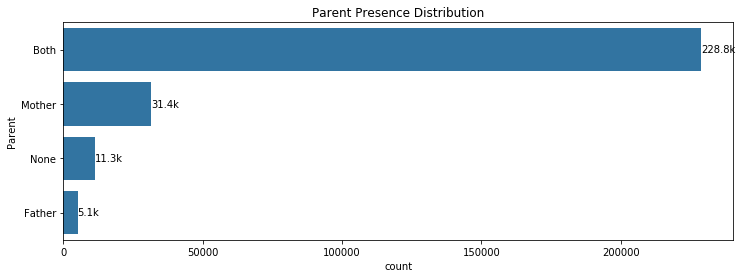

In [22]:
plt.figure(figsize=(12,4))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='Parent', color=base_color, order=parent_order);


# Logic to print the proportion text on the bars
for i in range (parent_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = parent_counts[i]
    # Convert count into a percentage, and then into string
    string1 = '{:0.1f}'.format(count/1000)
    string2=string1 + 'k'
    # Print the string value on the bar. 
    plt.text(count+1, i, string2, va='center')

plt.title('Parent Presence Distribution');

### Mood Check

How is the general mood of students.
Potisive feelings are set to 1 and increase in index means feelings become negative.
It is observed that 

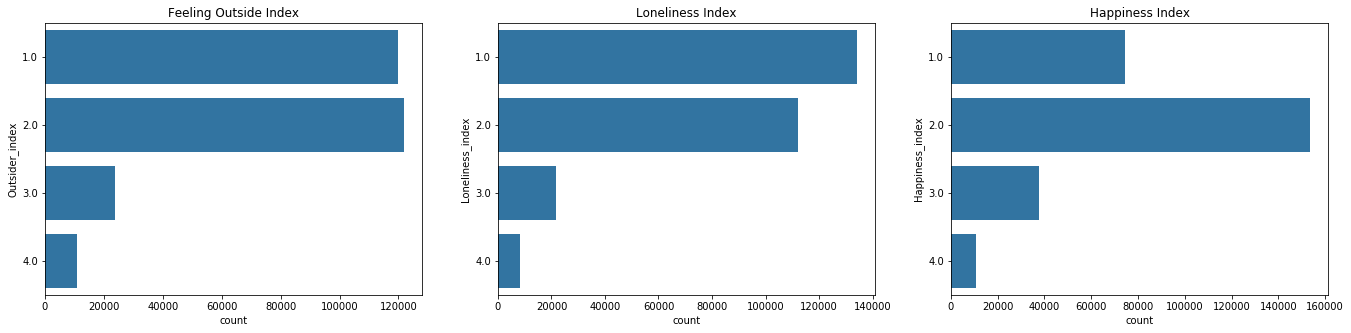

In [23]:

fig, ax =plt.subplots(1,3,figsize=(23, 5))

ax[0].set_title("Feeling Outside Index")
sb.countplot(data=df, y='Outsider_index',color=base_color,ax=ax[0]);
ax[1].set_title("Loneliness Index");
sb.countplot(data=df, y='Loneliness_index', color=base_color,ax=ax[1]);
ax[2].set_title("Happiness Index");
sb.countplot(data=df, y='Happiness_index', color=base_color,ax=ax[2]);



### Test Scores

Test scores for all of the test results are normally distributed and all of the scores are centered around 500.
Most of the students' scores are between 350 and 650 points.


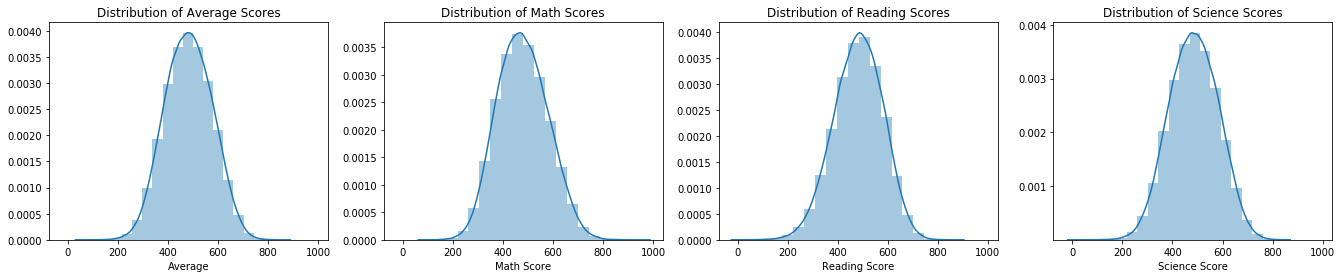

In [24]:
#ASK: RANGE AND XTICKS
#show mean 
f, ax = plt.subplots(1, 4, figsize=(23, 4), sharex=True)
plt.yticks([0.001,0.002,0.003,0.004])

ax[0].set_title("Distribution of Average Scores")
sb.distplot(df['Average'], bins=20,ax=ax[0]);
plt.yticks([0.001,0.002,0.003,0.004]);

ax[1].set_title("Distribution of Math Scores")
sb.distplot(df['Math Score'],bins=20,ax=ax[1]);
plt.yticks([0.001,0.002,0.003,0.004]);

ax[2].set_title("Distribution of Reading Scores")
sb.distplot(df['Reading Score'], bins=20,ax=ax[2]);
plt.yticks([0.001,0.002,0.003,0.004]);


ax[3].set_title("Distribution of Science Scores")
sb.distplot(df['Science Score'], bins=20,ax=ax[3]);
plt.yticks([0.001,0.002,0.003,0.004]);



## Bivariate Exploration

## How is the loss of a parent affects scores?
It is observed that the loss of parent has negative affect on scores students and those who lost both parent has the lowest scores.


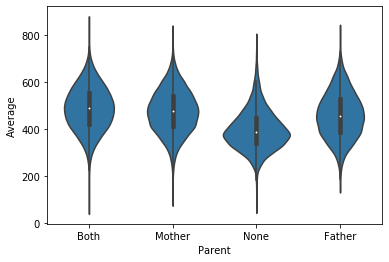

In [25]:
sb.violinplot(data = df,x ='Parent', y ='Average', color=base_color, innner=None);

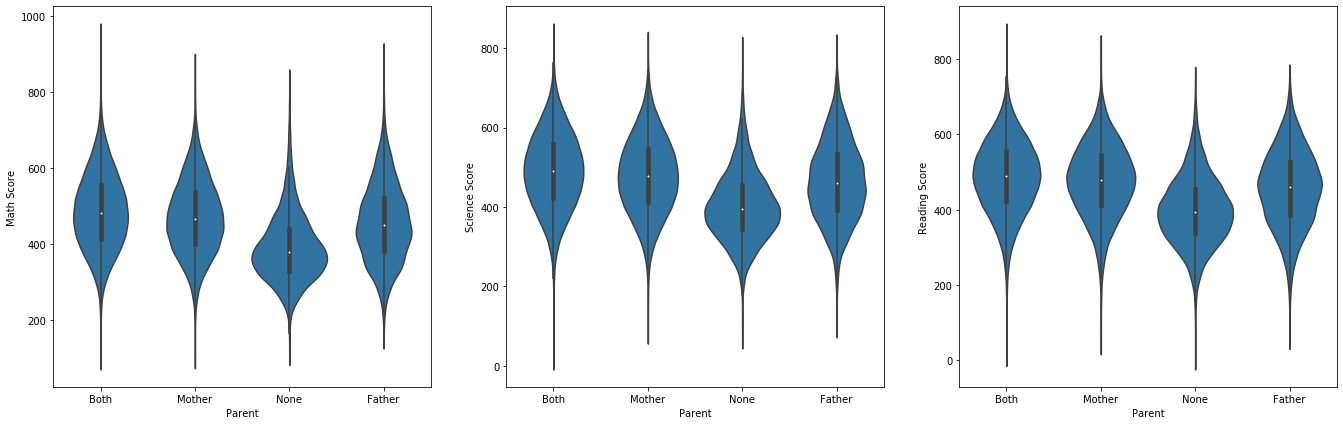

In [26]:

f, ax = plt.subplots(1, 3, figsize=(23, 7), sharex=True)
sb.violinplot(data = df,x ='Parent', y ='Math Score', color=base_color, innner=None,ax=ax[0]);
sb.violinplot(data = df,x ='Parent', y ='Science Score', color=base_color, innner=None,ax=ax[1]);
sb.violinplot(data = df,x ='Parent', y ='Reading Score', color=base_color, innner=None,ax=ax[2]);

## What is the correlation  between scores and feelings?
All of the scores are strongly correlated, science and math scores have the strongest correlation.
Feeling outsider and feeling lonely has negative but insignificant correlation with scores.

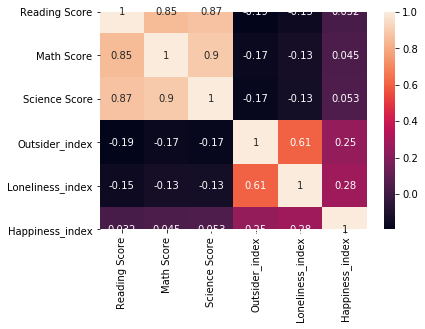

In [27]:
sb.heatmap(data=df[['Reading Score','Math Score','Science Score','Outsider_index','Loneliness_index','Happiness_index']].corr(),annot=True);

## How is feeling outsider, feeling of loneliness, presence of parents and average scores are related?
We understand  student who feel more lonely and outsider has lower average scores regardless of the presence of parents. Also loss of parent has a negative affect on average results. Which was also observed above.
It is also observed that varibility is bigger when both parents are not present.  Variability in average scores is highest when only father is present. 


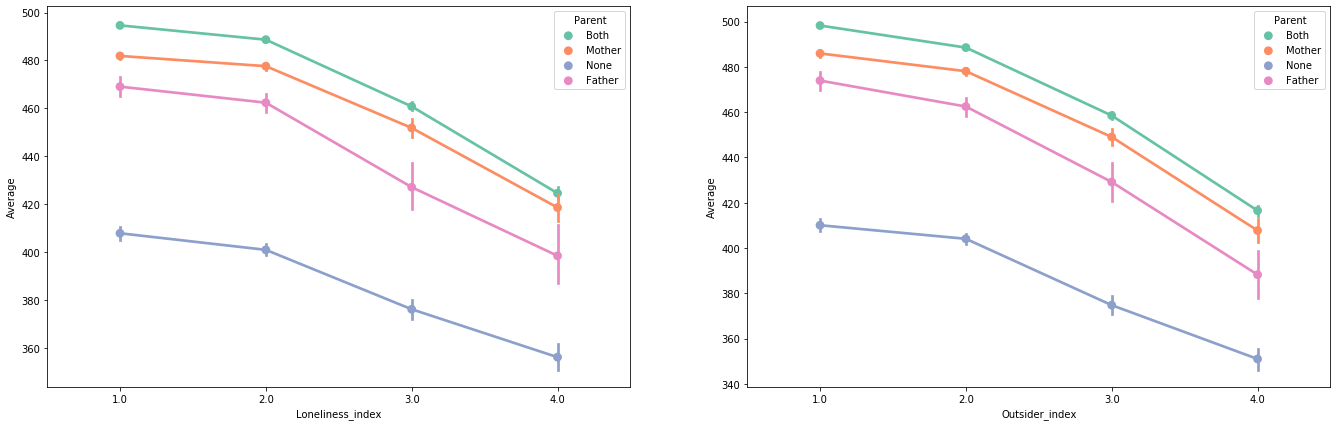

In [104]:
f, ax = plt.subplots(1, 2, figsize=(23, 7), sharex=True)

sb.pointplot(data = df,x ='Loneliness_index', y ='Average', hue='Parent', color=base_color,inner=None,palette="Set2",ax=ax[0]);
sb.pointplot(data = df,x ='Outsider_index', y ='Average', hue='Parent', color=base_color,inner=None,palette="Set2",ax=ax[1]);


## How is happiness, presence of parents and average scores are related?
Students who strongly disagrees and who strongly agrees to feel happy at school has lower scores.
Also loss of parent has a negative affect on average results as observed above. 
It is also observed that varibility is bigger when both parents are not present.  Variability in average scores is highest when only father is present. Interesting. I would like to see how the 

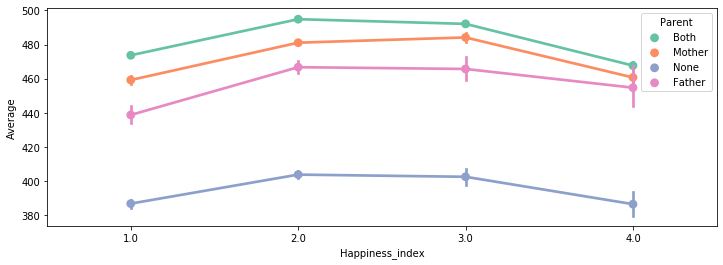

In [106]:
plt.figure(figsize=(12,4))
sb.pointplot(data = df,x ='Happiness_index', y ='Average', hue='Parent', color=base_color,inner=None,palette="Set2");

In [ ]:
The regression line that got fit suggest a slight upward trend in average scores but this is not clear from the data.
I added jitter and apoqueness but center is still pretty indistinguishable. 

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

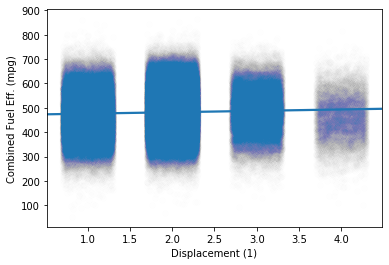

In [128]:
sb.regplot(data=df, x='Happiness_index',y='Average', x_jitter=0.3,scatter_kws={'alpha':1/500});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In [136]:
df.shape

(276618, 18)

In [ ]:
Lets create a heatmap as an alternative. We observed that out of 276K students most of the students agrees to feel happy at school and most of htem scores between 450 and 550i


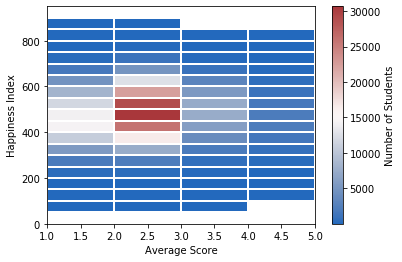

In [133]:
ybins=np.arange(0,900+100,50)
xbins=np.arange(1,5+1,1)
plt.hist2d(data=df, x='Happiness_index',y='Average',bins=[xbins,ybins],edgecolor='white', cmap = 'vlag', cmin = 0.5);
plt.xlabel('Average Score')
plt.ylabel('Happiness Index');
plt.colorbar(label = 'Number of Students');